In [272]:
import random
random.seed(42)
from collections import deque
import networkx as nx
import matplotlib.pyplot as plt

# Lit 🔥 Review Visualiser

# THE PAPER IS THE GRAPH

what does that mean? Welllll a Paper is an inherenetly recursive object in the real world, it has references which are papers which have references which are papers... 

So the object that we create to represent a Paper needs to represent this property, however we need to add a base case (a depth at which we no longer care about the references)

The real world has no recursion depth limits but python does

In [273]:
class Paper:

    def __init__(self, name = 0, distance = 0, references = []):
        """this constructor is recursive, eaech Paper create 
        a list of Papers that it references"""
        self.__name = name
        self.__distance = distance
        self.__references = self.create_references() if references == [] else references

    def create_references(self):
        # return an empty list if we have exceeded relevant depth
        if self.get_distance() > 3:
            return []
        # otherwise, return a list of Paper objects, their distance set to this paper's distance + 1
        return [Paper(self.get_name() - n, self.get_distance() + 1) for n in range(1, 6)]
    
    def find_distance(self, name):
        queue = deque([(self, 0)])  # the queue will hold tuples of (paper, distance)
        while queue:
            paper, distance = queue.popleft()  # Dequeue a paper

            # if the target paper is this paper return the distance
            if name == paper.get_name():
                return distance
            
            # if the target paper is found in a paper's references, return the distance + 1
            elif name in [reference.get_name() for reference in paper.get_references()]:
                    print(f"Found {name} in {paper.get_name()}'s references")
                    return distance + 1
            else:
                # add all the paper's references to the queue with a distance of distance + 1
                for reference in paper.get_references():
                    queue.append((reference, distance + 1))

        # if the queue is empty and the paper hasn't been found, return infinity
        return float('inf')
    
    def count_references(self, name):
        count = 0
        queue = deque([self])  # the queue will hold papers
        while queue:
            paper = queue.popleft()  # Dequeue a paper

            # if the target paper is found in a paper's references, increment the count
            if name in [reference.get_name() for reference in paper.get_references()]:
                count += 1

            # add all the paper's references to the queue
            for reference in paper.get_references():
                queue.append(reference)

        return count

    
    def create_graph(self, graph=None):
        if graph is None:
            graph = nx.DiGraph()
        graph.add_node(self.get_name())
        for paper in self.get_references():
            graph.add_edge(self.get_name(), paper.get_name())
            paper.create_graph(graph)
        return graph

    
    def get_name(self):
        return self.__name
    
    def get_distance(self):
        return self.__distance

    def get_references(self):
        return self.__references

    def __repr__(self):
        return f"{self.get_name()}: {self.get_references()}"

In [274]:
paper = Paper(2024)

In [275]:
paper.count_references(2020)

8

## Finding distance from root paper to any given reference

`find_distance()` returns the shortest distance found from one Paper to another

In [276]:
paper.find_distance(2024)

0

Distance from the paper to itself is 0

In [277]:
paper.find_distance(2020)

Found 2020 in 2024's references


1

In [278]:
paper.find_distance(2022)

Found 2022 in 2024's references


1

The search is implemented breadth-first: you can see 2022 in 2023's references, but we check all the references of a given paper _before_ we check _its_ references

In [279]:
paper.get_references()

[2023: [2022: [2021: [2020: [], 2019: [], 2018: [], 2017: [], 2016: []], 2020: [2019: [], 2018: [], 2017: [], 2016: [], 2015: []], 2019: [2018: [], 2017: [], 2016: [], 2015: [], 2014: []], 2018: [2017: [], 2016: [], 2015: [], 2014: [], 2013: []], 2017: [2016: [], 2015: [], 2014: [], 2013: [], 2012: []]], 2021: [2020: [2019: [], 2018: [], 2017: [], 2016: [], 2015: []], 2019: [2018: [], 2017: [], 2016: [], 2015: [], 2014: []], 2018: [2017: [], 2016: [], 2015: [], 2014: [], 2013: []], 2017: [2016: [], 2015: [], 2014: [], 2013: [], 2012: []], 2016: [2015: [], 2014: [], 2013: [], 2012: [], 2011: []]], 2020: [2019: [2018: [], 2017: [], 2016: [], 2015: [], 2014: []], 2018: [2017: [], 2016: [], 2015: [], 2014: [], 2013: []], 2017: [2016: [], 2015: [], 2014: [], 2013: [], 2012: []], 2016: [2015: [], 2014: [], 2013: [], 2012: [], 2011: []], 2015: [2014: [], 2013: [], 2012: [], 2011: [], 2010: []]], 2019: [2018: [2017: [], 2016: [], 2015: [], 2014: [], 2013: []], 2017: [2016: [], 2015: [], 2014: 

Attempting to find the distance to a paper that isn't referenced will return `inf`, in other words, not in the references

In [280]:
paper.find_distance(2025)

inf

In [281]:
paper.find_distance(1997)

inf

## Find the number of edges

In other words, in our graph, how many times is a given paper referenced? 

In [282]:
paper.count_references(2024)

0

The root of the graph will have no edges in our implementation, as we have hardcoded papers to only contain references to earlier years, but they may in an actual use case

In [283]:
paper.count_references(2010)

71

Papers from earlier years will naturally have more references

## Combining two graphs

In [284]:
paper_24 = Paper(2024)

In [285]:
paper_10 = Paper(2010)

In [286]:
new_root = Paper(2025, 0, [paper_24, paper_10])

In [287]:
new_root.get_references()

[2024: [2023: [2022: [2021: [2020: [], 2019: [], 2018: [], 2017: [], 2016: []], 2020: [2019: [], 2018: [], 2017: [], 2016: [], 2015: []], 2019: [2018: [], 2017: [], 2016: [], 2015: [], 2014: []], 2018: [2017: [], 2016: [], 2015: [], 2014: [], 2013: []], 2017: [2016: [], 2015: [], 2014: [], 2013: [], 2012: []]], 2021: [2020: [2019: [], 2018: [], 2017: [], 2016: [], 2015: []], 2019: [2018: [], 2017: [], 2016: [], 2015: [], 2014: []], 2018: [2017: [], 2016: [], 2015: [], 2014: [], 2013: []], 2017: [2016: [], 2015: [], 2014: [], 2013: [], 2012: []], 2016: [2015: [], 2014: [], 2013: [], 2012: [], 2011: []]], 2020: [2019: [2018: [], 2017: [], 2016: [], 2015: [], 2014: []], 2018: [2017: [], 2016: [], 2015: [], 2014: [], 2013: []], 2017: [2016: [], 2015: [], 2014: [], 2013: [], 2012: []], 2016: [2015: [], 2014: [], 2013: [], 2012: [], 2011: []], 2015: [2014: [], 2013: [], 2012: [], 2011: [], 2010: []]], 2019: [2018: [2017: [], 2016: [], 2015: [], 2014: [], 2013: []], 2017: [2016: [], 2015: [],

In [288]:
new_root.count_references(2024)

1

In [289]:
new_root.count_references(2010)

72

The `new_root` is now considered a paper, you can think about this as the placeholder for the paper you are planning to write in real life!

As such, the distance from that paper to 2024 and 2010 is now 1

In [297]:
G = new_root.create_graph()

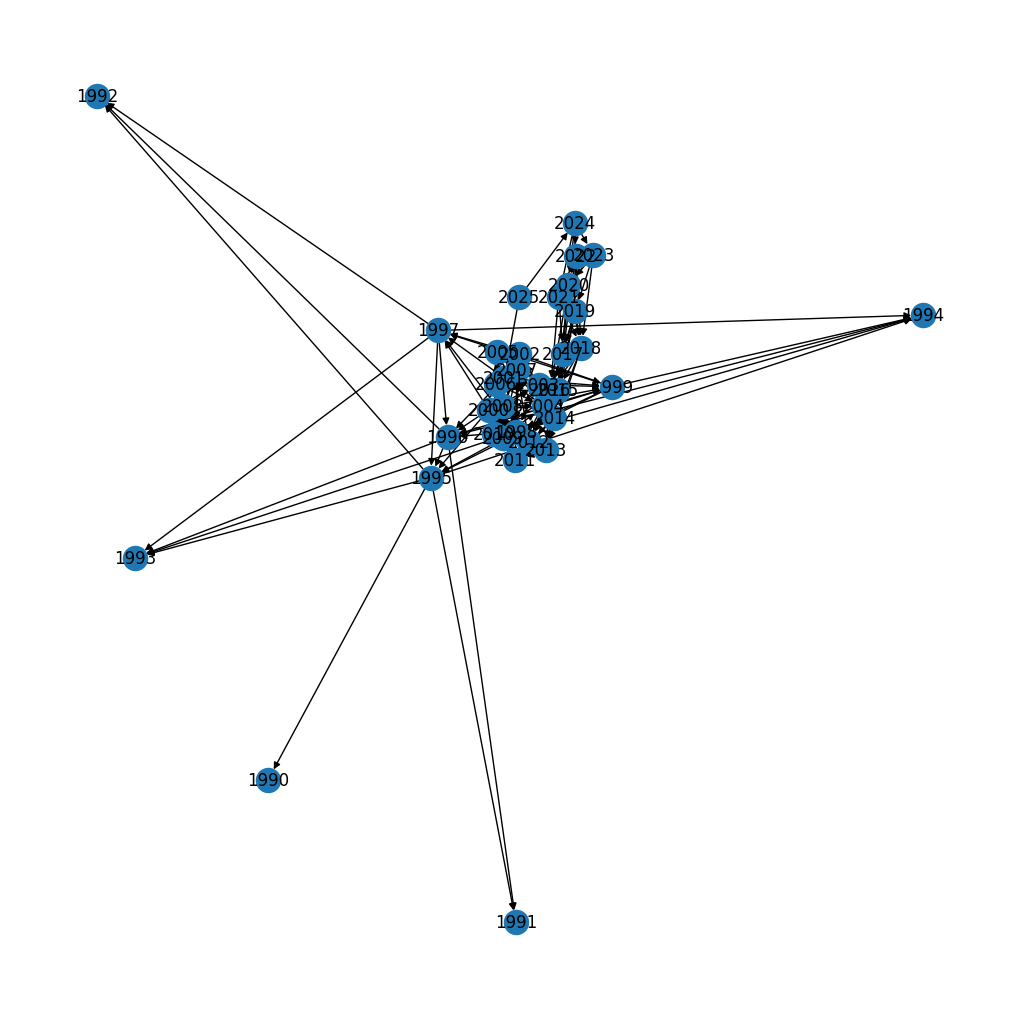

In [305]:
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True)
plt.show()

## Testing

In [326]:
%pip install ipytest --quiet
import ipytest

Note: you may need to restart the kernel to use updated packages.


In [327]:
ipytest.autoconfig()

In [336]:
paper = Paper(2024)

def test_get_name():
    assert paper.get_name() == 2024

def test_get_distance():
    assert paper.get_distance() == 0

def test_create_references():
    references = paper.get_references()
    assert len(references) == 5

def test_find_distance():
    assert paper.find_distance(2024) == 0
    assert paper.find_distance(2020) == 1
    assert paper.find_distance(0) == float('inf')

def test_count_references():
    assert paper.count_references(2024) == 0
    assert paper.count_references(2010) == 71

def test_create_graph():
    G = paper.create_graph()
    assert len(G.nodes) == 21
    assert len(G.edges) == 80

ipytest.run('-vv')

======================================= test session starts ========================================
platform linux -- Python 3.11.8, pytest-8.2.0, pluggy-1.5.0 -- /home/eoin/anaconda3/envs/alg-ass-group/bin/python
cachedir: .pytest_cache
rootdir: /home/eoin/proj/algs/lit-review
collecting ... collected 6 items

t_f1ee77dc239f40dd8f8ff3b97800fb9f.py::test_get_name PASSED                                  [ 16%]
t_f1ee77dc239f40dd8f8ff3b97800fb9f.py::test_get_distance PASSED                              [ 33%]
t_f1ee77dc239f40dd8f8ff3b97800fb9f.py::test_create_references PASSED                         [ 50%]
t_f1ee77dc239f40dd8f8ff3b97800fb9f.py::test_find_distance PASSED                             [ 66%]
t_f1ee77dc239f40dd8f8ff3b97800fb9f.py::test_count_references PASSED                          [ 83%]
t_f1ee77dc239f40dd8f8ff3b97800fb9f.py::test_create_graph PASSED                              [100%]

======================================== 6 passed in 0.03s ==========================

<ExitCode.OK: 0>